In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%precision 3
%matplotlib inline

In [12]:
df = pd.read_csv('./data/ch4_scores400.csv')
scores = np.array(df['score'])
scores[:10]

array([76, 55, 80, 80, 74, 61, 81, 76, 23, 80])

In [3]:
# 시험에 나옵니당

# 모집단: 추측하고 싶은 관측 대상 전체
# 표본: 추측에 사용하는 관측 대상의 일부분
# 표본추출: 모집단에서 표본을 골라내는 일
# 표본 크기: 골라낸 표본의 수

# 표본통계량: 표본을 바탕으로 계산한 평균이나 분산, 상관계수
# 모수: 모집단의 평균이나 분산, 상관계수

# 표본평균: 표본집단의 평균
# 모평균: 모집단의 평균

In [4]:
# 중요 시험

# 추정량: 표본평균으로 모평균을 추측할 때, 표본평균이 추정량에 해당
#        ex) 모집단: 전교생 400명, 모수: x, 표본집단: 학생 20명, 표본평균: 추정량

# 추정값: 실제로 표본의 데이터를 이용해 추정한 모수 값 (just 추정)

---

표본추출 방법

In [6]:
# 무작위추출: 랜덤으로 추출하는 방법 (편향 가능성 존재)

# 복원 추출: 모집단을 반복 사용해, 여러 차례 동일한 표본을 선택할 수 있는 추출 방법
np.random.choice([1, 2, 3], 3)

array([3, 3, 1])

In [21]:
# 비복원 추출: 동일한 표본은 한 번만 선택하는 방법 (뽑힌 모집단을 복원하지 않음)
np.random.choice([1, 2, 3], 3, replace=False)

# np.random.choice(모집단, 뽑을 개수, replace=?)
# -> replace: 복원추출 여부 (기본값 = True)
# -> 뽑을 개수 지정을 안한다면? 기본값 1개

array([2, 3, 1])

In [10]:
# 난수 시드: 난수의 시작점을 고정하는 숫자로, 매번 동일한 랜덤 값을 재현할 수 있게 함
#  => 다른 사람도 같은 결과 재현 가능
np.random.seed(42)
np.random.choice([1, 2, 3], 3)

array([3, 1, 3])

In [17]:
np.random.seed(0)
sample = np.random.choice(scores, 20)
print(f"표본 평균: {sample.mean()}")

print(f"모평균: {scores.mean()}")

표본 평균: 70.4
모평균: 69.53


In [18]:
# 무작위추출은 실행할 때마다 결과가 달라지기 때문에, 얻어진 표본평균도 매번 달라짐
for i in range(5):
    sample = np.random.choice(scores, 20)
    print(f"{i+1}번째 무작위 추출로 얻어진 표본평균: {sample.mean()}")

1번째 무작위 추출로 얻어진 표본평균: 72.45
2번째 무작위 추출로 얻어진 표본평균: 63.7
3번째 무작위 추출로 얻어진 표본평균: 66.05
4번째 무작위 추출로 얻어진 표본평균: 71.7
5번째 무작위 추출로 얻어진 표본평균: 74.15


---

In [ ]:
# 확률: 불확실성을 수반한 현상을 해석하기 위해 사용
# 확률 모형: 확률을 사용한 무작위추출 (주사위를 모델링한 것)
# 확률 변수: 결과는 알 수 없지만, 취하는 값과 그 값이 나올 확률이 결정되어 있는 것 --> 주사위는 모두 1/6 확률 :star:

# 시행: 확률 변수의 결과를 관측한 것
# 실현값: 시행에 의해 관측된 값
# 사건: 시행 결과로 나타날 수 있는 일 --> '주사위 눈이 홀수' :star:
# 근원사건: 더 세부적으로 분해할 수 없는 사건 --> '주사위 눈이 1' :star:

# 상호배반: 동시에 일어날 수 없는 사건
# => 사건이 상호 배반이라면, 그 중 적어도 하나 일어나는 사건은 각 사건의 확률의 합과 같다

In [23]:
# 확률분포: 확률변수가 어떻게 움직이는지를 나타낸 것

# 불공정한 주사위
dice = [1, 2, 3, 4, 5, 6]
prob = [1/21, 2/21, 3/21, 4/21, 5/21, 6/21]

np.random.choice(dice, p=prob)

# size 지정 없으니, 주사위를 한 번 던지는 것
# p: 각 요소가 선택될 확률을 나타내는 리스트 => p의 합은 반드시 1 (즉, 확률분포!)
#    -> p가 None이라면 균등분포 처리

np.int64(2)

(참고)np.random.choice() 내부 동작
1. 컴퓨터가 0~1 사이의 난수(예: 0.63) 생성
2. 그 난수가 누적확률(확률분포에 따라 결정) 어디에 속하는지 확인
3. 누적확률 구간에 해당하는 값 반환

In [25]:
# 100번 시도
num_trial = 100

sample = np.random.choice(dice, num_trial, p=prob)
sample

array([5, 1, 3, 5, 5, 3, 6, 5, 5, 5, 6, 4, 4, 3, 3, 6, 6, 5, 3, 3, 2, 4,
       4, 5, 4, 3, 1, 2, 5, 4, 5, 6, 6, 3, 5, 3, 1, 6, 4, 4, 5, 6, 5, 6,
       3, 6, 3, 6, 5, 3, 6, 6, 3, 3, 5, 1, 3, 4, 4, 4, 3, 5, 6, 2, 5, 2,
       6, 4, 5, 3, 3, 5, 4, 6, 6, 6, 6, 2, 5, 5, 6, 4, 3, 2, 1, 6, 5, 6,
       3, 5, 2, 5, 6, 6, 4, 6, 3, 6, 6, 6])

In [28]:
# 도수분포표 작성

freq, _ = np.histogram(sample, bins=6, range=(1, 7))
pd.DataFrame({'frequency': freq, 'relative frequency': freq/num_trial}, index=pd.Index(np.arange(1,7), name='dice'))

,frequency,relative frequency
dice,,
1,5,0.05
2,7,0.07
3,21,0.21
4,15,0.15
5,24,0.24
6,28,0.28


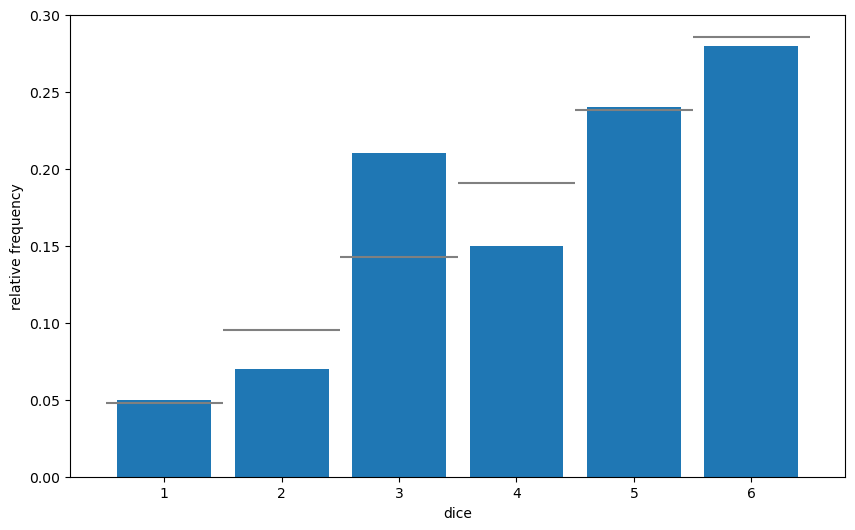

In [32]:
# 도수분포표 히스토그램
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111)
ax.hist(sample, bins=6, range=(1, 7), density=True, rwidth=0.8)

ax.hlines(prob, np.arange(1,7), np.arange(2,8), colors='gray')

ax.set_xticks(np.linspace(1.5, 6.5, 6))
ax.set_xticklabels(np.arange(1,7))
ax.set_xlabel('dice')
ax.set_ylabel('relative frequency')

plt.show()

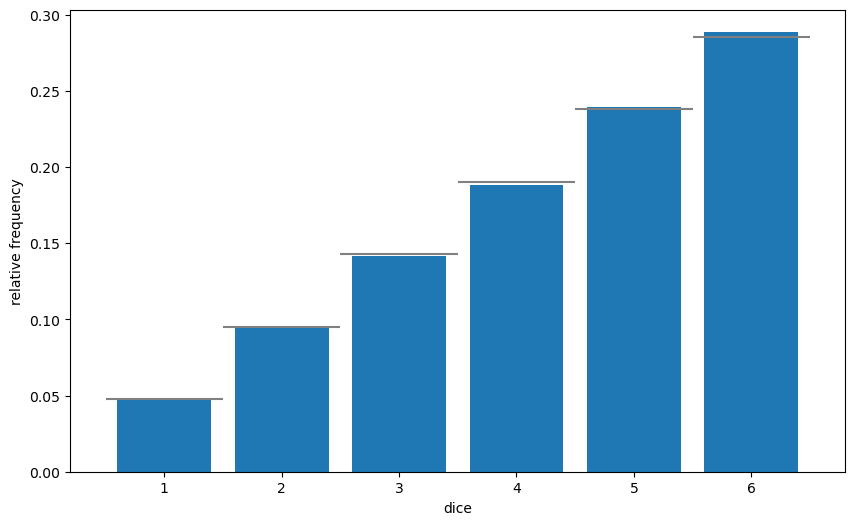

In [34]:
# 10000번 시행: 실제 확률분포와 가까워짐
num_trial = 100000
sample = np.random.choice(dice, size=num_trial, p=prob)

fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111)
ax.hist(sample, bins=6, range=(1, 7), density=True, rwidth=0.8)

ax.hlines(prob, np.arange(1,7), np.arange(2,8), colors='gray')

ax.set_xticks(np.linspace(1.5, 6.5, 6))
ax.set_xticklabels(np.arange(1,7))
ax.set_xlabel('dice')
ax.set_ylabel('relative frequency')

plt.show()

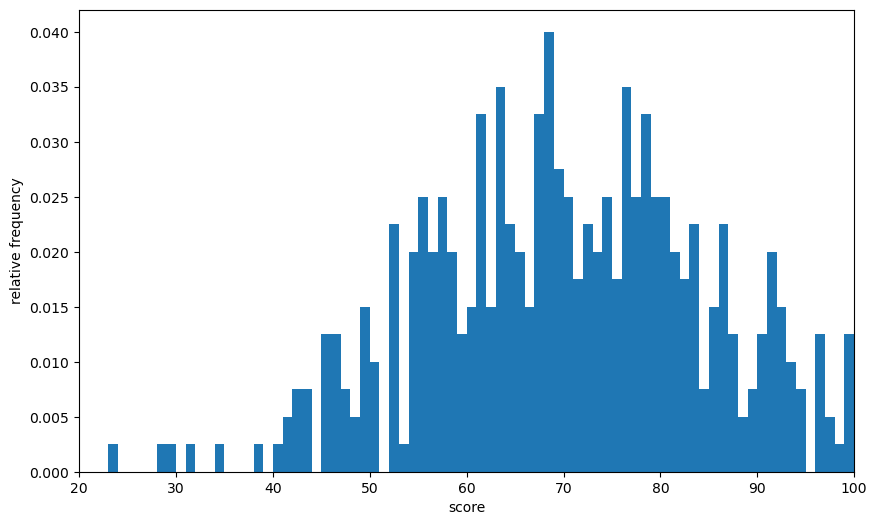

In [38]:
# 전교생 시험 점수 분포

fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111)
ax.hist(scores, bins=100, range=(0, 100), density=True)
ax.set_xlim(20, 100)
ax.set_ylim(0, 0.042)
ax.set_xlabel('score')
ax.set_ylabel('relative frequency')
plt.show()

In [40]:
np.random.choice(scores)

np.int64(74)

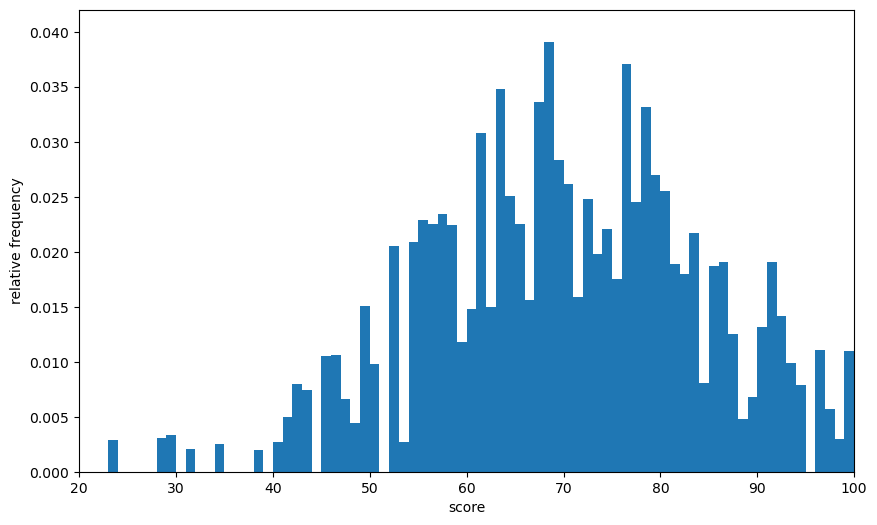

In [41]:
# 10000명 대상 -> 실제와 가까워짐
sample= np.random.choice(scores, 10000)

fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111)
ax.hist(sample, bins=100, range=(0, 100), density=True)
ax.set_xlim(20, 100)
ax.set_ylim(0, 0.042)
ax.set_xlabel('score')
ax.set_ylabel('relative frequency')
plt.show()

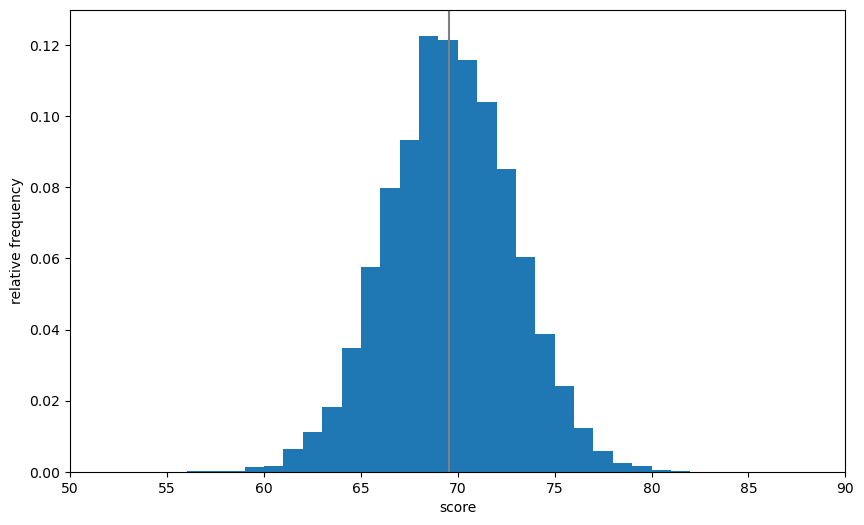

In [47]:
# 표본평균도 시행횟수가 많아지면 모평균과 유사해짐

scores = np.array(df['score'])

sample_means = [np.random.choice(scores, 20).mean()
                for _ in range(10000)]

fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111)
ax.hist(sample_means, bins=100, range=(0, 100), density=True)

ax.vlines(np.mean(scores), 0, 1, 'gray')
ax.set_xlim(50, 90)
ax.set_ylim(0, 0.13)
ax.set_xlabel('score')
ax.set_ylabel('relative frequency')
plt.show()